<a href="https://colab.research.google.com/github/hajihye123/MachineLearning_Lecture/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_5%EC%9D%BC%EC%B0%A8_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.3, random_state=42)

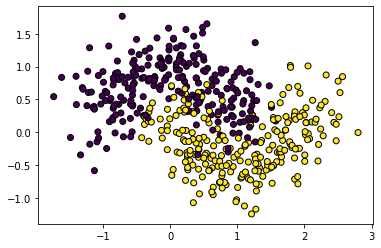

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()

In [6]:
from sklearn.model_selection import GridSearchCV

params = {'min_samples_split': list(range(2, 10))}
grid_search_cv = GridSearchCV(tree_clf, params, verbose=1, cv=5, n_jobs=-1)
grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9]},
       

In [7]:
grid_search_cv.best_params_

{'min_samples_split': 2}

In [8]:
tree_clf = grid_search_cv.best_estimator_

y_test_pred = tree_clf.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.86

In [9]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instance = 200

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instance, random_state=42)
for mini_train_idx, mini_test_idx in rs.split(X_train):
  X_mini_train = X_train[mini_train_idx]
  y_mini_train = y_train[mini_train_idx]
  mini_sets.append((X_mini_train, y_mini_train))

In [10]:
from sklearn.base import clone

forest = [clone(tree_clf) for _ in range(n_trees)]
for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
  tree.fit(X_mini_train, y_mini_train)

In [11]:
for idx, i in enumerate([1, 2, 3]):
  print(idx, i)

0 1
1 2
2 3


In [12]:
import numpy as np

Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)
for tree_idx, tree in enumerate(forest):
  Y_pred[tree_idx] = tree.predict(X_test)

In [13]:
from scipy.stats import mode

y_pred_votes, n_votes = mode(Y_pred, axis=0)

In [14]:
accuracy_score(y_test, y_pred_votes.reshape([-1]))

0.89

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

log_clf = LogisticRegression(random_state=42)
svm_clf = SVC(probability=True, random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='soft'
)

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                               

In [16]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.85
RandomForestClassifier 0.88
SVC 0.87
VotingClassifier 0.89


In [17]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500, max_samples=100,
    bootstrap=True, random_state=42, oob_score=True
)

bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=42,
  

In [18]:
bag_clf.oob_score_

0.9175

In [19]:
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9

In [20]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(max_samples=200, max_features=0.5)
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.87

In [21]:
from sklearn.datasets import load_iris
iris = load_iris()

rnd_clf = RandomForestClassifier(random_state=42)
rnd_clf.fit(iris['data'], iris['target'])
rnd_clf.feature_importances_

array([0.10612762, 0.02167809, 0.43612951, 0.43606478])

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200, learning_rate=0.5
)

ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.89

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X_train, y_train)
y_pred = gbrt.predict(X_test)
accuracy_score(y_test, y_pred)

0.9

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import LinearSVC

#
#
#

In [ ]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(
    mnist.data, mnist.target, test_size = 10000, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size = 10000, random_state=42
)

In [ ]:
# 개별 모델을 학습해서 검증 데이터에 대한 성능 출력!


In [ ]:
# 여러가지 앙상블 기법을 이용해서 성능 출력

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# Voting의 경우에는 단일 모델의 조합을 바꿔보세요

In [ ]:
# 가장 성능이 좋은 모델로 테스트 데이터에 대한 성능을 출력하세요.